In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def load_images_from_dir(directory):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            images.append(img)
    return images

def load_data():
    closed_path = 'data/heart/closed'
    open_path = 'data/heart/open'
    contours_path = 'data/heart/various/contours'
    masks_path = 'data/heart/various/masks'
    non_heart_path = 'data/non-heart'

    closed_images = load_images_from_dir(closed_path)
    open_images = load_images_from_dir(open_path)
    contours_images = load_images_from_dir(contours_path)
    masks_images = load_images_from_dir(masks_path)
    non_heart_images = load_images_from_dir(non_heart_path)

    closed_images = np.array(closed_images)
    open_images = np.array(open_images)
    contours_images = np.array(contours_images)
    masks_images = np.array(masks_images)
    non_heart_images = np.array(non_heart_images)

    print("Heart Ultrasound Images:")
    print("Number of closed heart ultrasound images:", len(closed_images))
    print("Number of open heart ultrasound images:", len(open_images))
    print("Number of various heart ultrasound images:", len(contours_images))
    print("Number of mask images:", len(masks_images))

    print("\nNon-Heart Ultrasound Images:")
    print("Number of non-heart images:", len(non_heart_images))
    
    return closed_images, open_images, contours_images, masks_images, non_heart_images

# Usage:
closed_images, open_images, contours_images, masks_images, non_heart_images = load_data()


Heart Ultrasound Images:
Number of closed heart ultrasound images: 80
Number of open heart ultrasound images: 138
Number of various heart ultrasound images: 218
Number of mask images: 218

Non-Heart Ultrasound Images:
Number of non-heart images: 925


In [2]:
import os
import cv2
import numpy as np
import pandas as pd

# Function to load and flatten images from a directory
def load_and_flatten_images(directory, label):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (resize_width, resize_height))
            images.append(img.flatten())
    labels = [label] * len(images)
    return images, labels

# Define image resize dimensions
resize_width = 25
resize_height = 25

# Define paths to directories containing images
closed_path = 'data/heart/closed'
open_path = 'data/heart/open'
contours_path = 'data/heart/various/contours'
masks_path = 'data/heart/various/masks'
non_heart_path = 'data/non-heart'

# Load and flatten images from each directory
closed_images, closed_labels = load_and_flatten_images(closed_path, 'mask')
open_images, open_labels = load_and_flatten_images(open_path, 'mask')
contours_images, contours_labels = load_and_flatten_images(contours_path, 'mask')
masks_images, masks_labels = load_and_flatten_images(masks_path, 'mask')
non_heart_images, non_heart_labels = load_and_flatten_images(non_heart_path, 'nomask')

# Concatenate images and labels
images = np.concatenate([closed_images, open_images, contours_images, masks_images])
labels = np.concatenate([closed_labels, open_labels, contours_labels, masks_labels])

# Create DataFrames
heart_data = pd.DataFrame(images)
heart_data['class'] = labels

# Create DataFrame for non-mask images
non_heart_data = pd.DataFrame(non_heart_images)
non_heart_data['class'] = non_heart_labels

# Display DataFrames
print("Heart Ultrasound Images:")
print(heart_data)

print("\nNon-Heart Ultrasound Images:")
print(non_heart_data)


Heart Ultrasound Images:
     0  1  2  3  4  5  6  7  8  9  ...  616  617  618  619  620  621  622  \
0    0  0  0  0  0  0  0  0  0  0  ...  129   60   40   64   26    0    0   
1    0  0  0  0  0  0  0  0  0  0  ...  122   63   36   57   85    2    0   
2    0  0  0  0  0  0  0  0  0  0  ...   92   57   22   56   20    1    1   
3    0  0  0  0  0  0  0  0  0  0  ...  106   67   30   52   45    1    0   
4    0  0  0  0  0  0  0  0  0  0  ...   67   63   24   51   62    2    1   
..  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
649  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
650  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
651  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
652  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
653  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

     623  624  class  
0      0    0   mask  
1   

In [3]:
closed_images = np.array(closed_images)
open_images = np.array(open_images)
contours_images = np.array(contours_images)
masks_images = np.array(masks_images)
non_heart_images = np.array(non_heart_images)
print("Data type of images after loading:")
print("Closed images data type:", closed_images.dtype)
print("Open images data type:", open_images.dtype)
print("Contours images data type:", contours_images.dtype)
print("Masks images data type:", masks_images.dtype)
print("Non-heart images data type:", non_heart_images.dtype)
print("\nShape of images:")
print("Closed images shape:", closed_images.shape)
print("Open images shape:", open_images.shape)
print("Contours images shape:", contours_images.shape)
print("Masks images shape:", masks_images.shape)
print("Non-heart images shape:", non_heart_images.shape)


Data type of images after loading:
Closed images data type: uint8
Open images data type: uint8
Contours images data type: uint8
Masks images data type: uint8
Non-heart images data type: uint8

Shape of images:
Closed images shape: (80, 625)
Open images shape: (138, 625)
Contours images shape: (218, 625)
Masks images shape: (218, 625)
Non-heart images shape: (925, 625)


Data type of images after loading: All images have a data type of uint8, which is typical for grayscale images.
Shape of images: The shape of each image is (25, 25) after flattening, resulting in a total of 625 features per image.
This output suggests that the images have been successfully loaded, resized, and flattened

KeyboardInterrupt: 

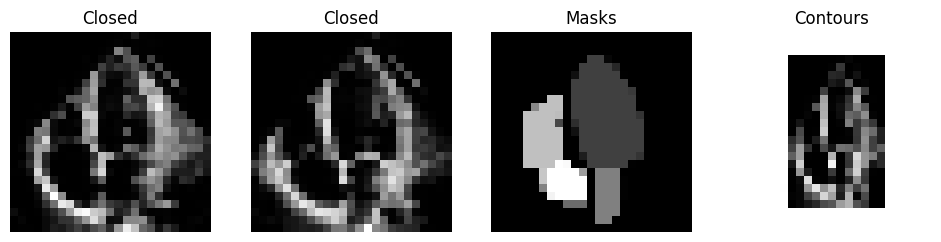

In [4]:
import matplotlib.pyplot as plt

# Function to display random images
def display_random_images(images, labels, title):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        idx = np.random.randint(len(images))
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[idx].reshape((resize_height, resize_width)), cmap='gray')
        plt.title(f'{labels[idx]}')
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display random heart ultrasound images
heart_images = np.concatenate([closed_images, open_images, contours_images, masks_images])
heart_labels = ['Closed'] * len(closed_images) + ['Open'] * len(open_images) + \
               ['Contours'] * len(contours_images) + ['Masks'] * len(masks_images)
display_random_images(heart_images, heart_labels, 'Heart Ultrasound')

# Display random non-heart ultrasound images
display_random_images(non_heart_images, ['Non-Heart'] * len(non_heart_images), 'Non-Heart Ultrasound')


In [ ]:
import io
from nbformat import current

filepath = 'coursework.ipynb' #this is the name of your coursework file!

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'ipynb')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)